<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-&amp;-Functions" data-toc-modified-id="Import-Libraries-&amp;-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries &amp; Functions</a></span></li><li><span><a href="#Read-the-Files" data-toc-modified-id="Read-the-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Files</a></span><ul class="toc-item"><li><span><a href="#Mapping-Ticker-Data" data-toc-modified-id="Mapping-Ticker-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mapping Ticker Data</a></span></li><li><span><a href="#Market-Psych" data-toc-modified-id="Market-Psych-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Market Psych</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Data</a></span></li></ul></li><li><span><a href="#Standard-Scaller" data-toc-modified-id="Standard-Scaller-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standard Scaller</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Regression-Model" data-toc-modified-id="Regression-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Regression Model</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>GridSearch</a></span></li><li><span><a href="#Fit-to-Whole-Training-Data" data-toc-modified-id="Fit-to-Whole-Training-Data-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Fit to Whole Training Data</a></span></li><li><span><a href="#Performance-or-Classification" data-toc-modified-id="Performance-or-Classification-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Performance or Classification</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li><li><span><a href="#Ensemble-Method" data-toc-modified-id="Ensemble-Method-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Ensemble Method</a></span></li></ul></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Standard-Scaller" data-toc-modified-id="Standard-Scaller-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Standard Scaller</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Archive-Code" data-toc-modified-id="Archive-Code-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Archive Code</a></span></li></ul></div>

# Import Libraries & Functions

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import pandas as pd

In [2]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

# Read the Files

## Mapping Ticker Data

In [3]:
fortune100 = pd.read_csv('../data/fortune100.csv')
dax40 = pd.read_csv('../data/DAX40.csv')
ftse100 = pd.read_csv('../data/FTSE100.csv')

fortune100 = fortune100[['Symbol','RIC']]
fortune100 = fortune100.rename(columns={'Symbol':'ticker_'})

dax40 = dax40[['Ticker','RIC']]
dax40 = dax40.rename(columns={'Ticker':'ticker_'})

ftse100 = ftse100[['Ticker','Query']]
ftse100 = ftse100.rename(columns={'Query':'RIC', 'Ticker':'ticker_'})

In [4]:
compile_indexes_df = pd.concat([fortune100, dax40, ftse100])

## Market Psych

In [5]:
MarketPsych_df = pd.read_csv('/Users/yogi/Desktop/MPsych.csv')

In [6]:
MarketPsych_df = MarketPsych_df.iloc[:, 1:]
MarketPsych_df = pd.concat([MarketPsych_df[['ticker_', 'Y']] , MarketPsych_df.drop(['ticker_','Y'], axis=1)], axis=1)

In [7]:
MarketPsych_df.head()

,ticker_,Y,buzz_News,buzz_News_Headline,buzz_News_Social,buzz_Social,innovation_News,innovation_News_Headline,innovation_News_Social,innovation_Social,...,layoffs_News_Social,layoffs_Social,managementTrust_News,managementTrust_News_Headline,managementTrust_News_Social,managementTrust_Social,mentions_News,mentions_News_Headline,mentions_News_Social,mentions_Social
0,LAND,2022,1498.70,63.0,1879.70,381.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,620.0,47.0,982.0,362.0
1,LAND,2023,934.00,13.0,979.00,45.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.176471,0.000000,0.200000,0.200000,469.0,27.0,483.0,14.0
2,BLND,2022,15537.50,705.5,20170.60,4633.1,0.090909,0.142857,0.125000,0.142857,...,0.086957,0.095238,0.090909,0.000000,0.047619,0.041667,3712.0,317.0,5664.0,1952.0
3,BLND,2023,7463.60,236.5,8992.50,1528.9,0.333333,0.000000,0.072727,0.062500,...,0.013158,0.019231,0.047059,0.000000,0.042105,0.000000,1909.0,120.0,2382.0,473.0
4,HL.,2022,72534.15,1474.0,85237.55,12703.4,0.025316,0.000000,0.025000,0.080000,...,0.036851,0.000000,0.117073,0.066667,0.081911,0.060606,12377.0,583.0,16391.0,4014.0


## Training Data

In [8]:
train_1 = pd.read_csv('../data/ML_Data/train_footsie_contains.csv')
train_2 = pd.read_csv('../data/ML_Data/train_fortune100_contains.csv')
train_3 = pd.read_csv('../data/ML_Data/train_DAX_contains.csv')

train_df = pd.concat([train_1,train_2,train_3], axis=0)
train_df = train_df.rename(columns={'firm':'RIC'})

In [9]:
train_df = pd.merge(train_df, compile_indexes_df, how='left', on = 'RIC')

In [10]:
train_df = pd.concat([train_df[['RIC', 'year' ,'ticker_']], train_df.drop(['RIC', 'year' ,'ticker_'], axis=1)], axis=1)

In [11]:
train_df.head()

,RIC,year,ticker_,0,1,2,3,4,5,6,...,760,761,762,763,764,765,766,767,ESG Controversies Score,ESG Controversies Score Grade
0,AAF.L,2022,AAF,-0.316090,0.325633,0.492556,-0.050070,0.381271,0.446845,-0.207054,...,0.180643,0.616740,-0.715521,0.880630,-0.490878,-0.111745,0.736818,0.420092,100.000000,A+
1,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
2,ABDN.L,2022,ABDN,-0.400195,-0.220467,-0.629772,0.436963,0.411417,-0.230281,0.104258,...,0.812860,0.249883,-0.261393,0.220430,-0.307368,-0.685380,-0.035406,0.278564,100.000000,A+
3,AHT.L,2022,AHT,-0.808410,0.125399,0.427910,0.202350,0.725803,0.359200,0.196529,...,0.937636,0.762159,-0.738225,0.972579,-0.804485,-0.530617,0.665348,0.749797,74.528302,B+
4,ANTO.L,2022,ANTO,-0.184318,-0.158951,-0.472866,0.285990,0.295325,-0.150287,-0.207242,...,0.642592,-0.064270,-0.249068,0.019297,0.019295,-0.622573,0.041856,-0.046189,100.000000,A+


In [12]:
train_completed_df = train_df.drop(['RIC','year', 'ticker_','ESG Controversies Score Grade','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [14]:
y = train_completed_df.iloc[:,-1]
X = train_completed_df.iloc[:,:-1]

# Standard Scaller

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
stdscaller = StandardScaler()

X_std_df = stdscaller.fit_transform(X)
X_std_df = pd.DataFrame(X_std_df)

# Principal Component Analysis

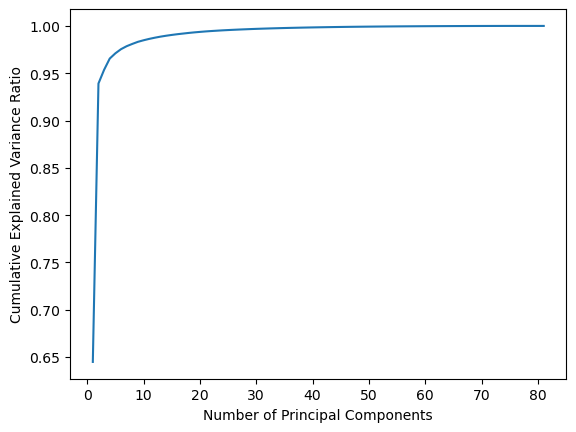

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to Xtrn_mn
pca = PCA()

pca.fit(X_std_df)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_exp_var_ratio = np.cumsum(explained_var_ratio)

# Plot the graph
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_exp_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [18]:
#(3) Your code goes here

# Calculate the cumulative explained variance ratio
cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain a certain percentage of the total variance
for percent in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    num_components = np.argmax(cumulative_explained_var_ratio >= percent) + 1
    print(f"Minimum number of principal components to explain {percent*100}% of variance: {num_components}")

Minimum number of principal components to explain 50.0% of variance: 1
Minimum number of principal components to explain 60.0% of variance: 1
Minimum number of principal components to explain 70.0% of variance: 2
Minimum number of principal components to explain 80.0% of variance: 2
Minimum number of principal components to explain 90.0% of variance: 2
Minimum number of principal components to explain 95.0% of variance: 3
Minimum number of principal components to explain 99.0% of variance: 15


In [19]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std_df)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=42)

# Regression Model

## XGBoost Regressor

In [21]:
# Create an XGBoostRegressor model
XGB_model = XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

### GridSearch

In [22]:
grid_search = GridSearchCV(XGB_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Root Mean Squared Error: 12.51236361749467


In [23]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Root Mean Squared Error: 28.655941217068452


In [63]:
grid_search = GridSearchCV(XGB_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error: 32.35878474854929


### Fit to Whole Training Data

In [24]:
XGB_model = XGBRegressor(**grid_search.best_params_)
XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_val)

In [25]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

### Performance or Classification

In [26]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.5384615384615384
['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'B']
['A', 'A', 'D', 'A', 'A', 'A', 'A', 'C', 'A', 'B', 'B', 'A', 'D']


## Random Forest Regressor

In [27]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

In [28]:
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error: 22.767474722595647


In [29]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error: 29.83666059798535


In [73]:
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Root Mean Squared Error: 30.763717619916108


In [44]:
rf_model = RandomForestRegressor(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

In [45]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [46]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.6666666666666666
['C', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A']
['D', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'C', 'D', 'B', 'A', 'A', 'A', 'A', 'A']


## Support Vector Regressor

In [30]:
# Support Vector Regressor
svr_model = SVR()

# Define the parameter grid for grid search
svr_param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C
    'epsilon': [0.01, 0.1, 0.5, 1.0],  # Epsilon parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly' kernels
}

In [31]:
grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error Training:", rmse)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error Test:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error Training: 0.9999562238649125
Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error Test: 32.0694878710298


In [79]:
grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Root Mean Squared Error: 34.06233962438234


In [51]:
svr_model = SVR(**grid_search.best_params_)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_val)

In [52]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [53]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.75
['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A']
['D', 'A', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'C', 'D', 'B', 'A', 'A', 'A', 'A', 'A']


## Ensemble Method

In [32]:
from sklearn.ensemble import VotingRegressor

In [34]:
from sklearn.linear_model import Ridge

In [35]:
# Define the individual regression models
model1 = Ridge(**{'alpha': 10.0, 'fit_intercept': True, 'solver': 'saga'})
model2 = RandomForestRegressor(**{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200})
model3 = SVR(**{'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'})

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('ridge', model1), ('RFR', model2), ('svr', model3)])

In [36]:
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('ridge', Ridge(alpha=10.0, solver='saga')),
                            ('RFR',
                             RandomForestRegressor(max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   n_estimators=200)),
                            ('svr', SVR(C=100, epsilon=1.0))])

In [37]:
y_train_pred = ensemble_model.predict(X_train)
# y_train_pred = [caps(val) for val in y_train_pred]
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)

In [38]:
# evaluation metrics
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 21.570077828849424


In [39]:
# Evaluate the best model on the test set
y_pred = ensemble_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
Root Mean Squared Error: 30.937609934093942


# Test Data

In [41]:
test_1 = pd.read_csv('../data/ML_Data/test_footsie_contains.csv')
test_2 = pd.read_csv('../data/ML_Data/test_fortune100_contains.csv')
test_3 = pd.read_csv('../data/ML_Data/test_DAX_contains.csv')

test_df = pd.concat([test_1,test_2,test_3], axis=0)
test_df = test_df.rename(columns={'firm':'RIC'})

In [42]:
test_df = pd.merge(test_df, compile_indexes_df, how='left', on = 'RIC')

In [44]:
test_df = pd.concat([test_df[['RIC', 'year' ,'ticker_']], test_df.drop(['RIC', 'year' ,'ticker_'], axis=1)], axis=1)

In [46]:
test_completed_df = test_df.drop(['RIC','year', 'ticker_','ESG Controversies Score Grade','ESG Controversies Score Grade'], axis=1).reset_index(drop=True)

In [14]:
y = train_completed_df.iloc[:,-1]
X = train_completed_df.iloc[:,:-1]

# Standard Scaller

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
stdscaller = StandardScaler()

X_std_df = stdscaller.fit_transform(X)
X_std_df = pd.DataFrame(X_std_df)

# Principal Component Analysis

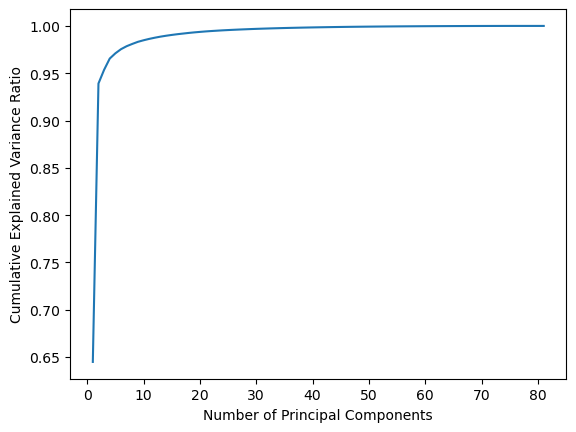

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to Xtrn_mn
pca = PCA()

pca.fit(X_std_df)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_exp_var_ratio = np.cumsum(explained_var_ratio)

# Plot the graph
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_exp_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [18]:
#(3) Your code goes here

# Calculate the cumulative explained variance ratio
cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain a certain percentage of the total variance
for percent in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    num_components = np.argmax(cumulative_explained_var_ratio >= percent) + 1
    print(f"Minimum number of principal components to explain {percent*100}% of variance: {num_components}")

Minimum number of principal components to explain 50.0% of variance: 1
Minimum number of principal components to explain 60.0% of variance: 1
Minimum number of principal components to explain 70.0% of variance: 2
Minimum number of principal components to explain 80.0% of variance: 2
Minimum number of principal components to explain 90.0% of variance: 2
Minimum number of principal components to explain 95.0% of variance: 3
Minimum number of principal components to explain 99.0% of variance: 15


In [19]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_std_df)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=42)

# Archive Code

In [211]:
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 22.841653795025273
